In [17]:
import pandas as pd

pricing_data = pd.read_csv("../data/raw/Competition_Data.csv")

print(pricing_data.head())

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity   
0      0        2019-11  store_459  item_526  134.49            435  \
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [18]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


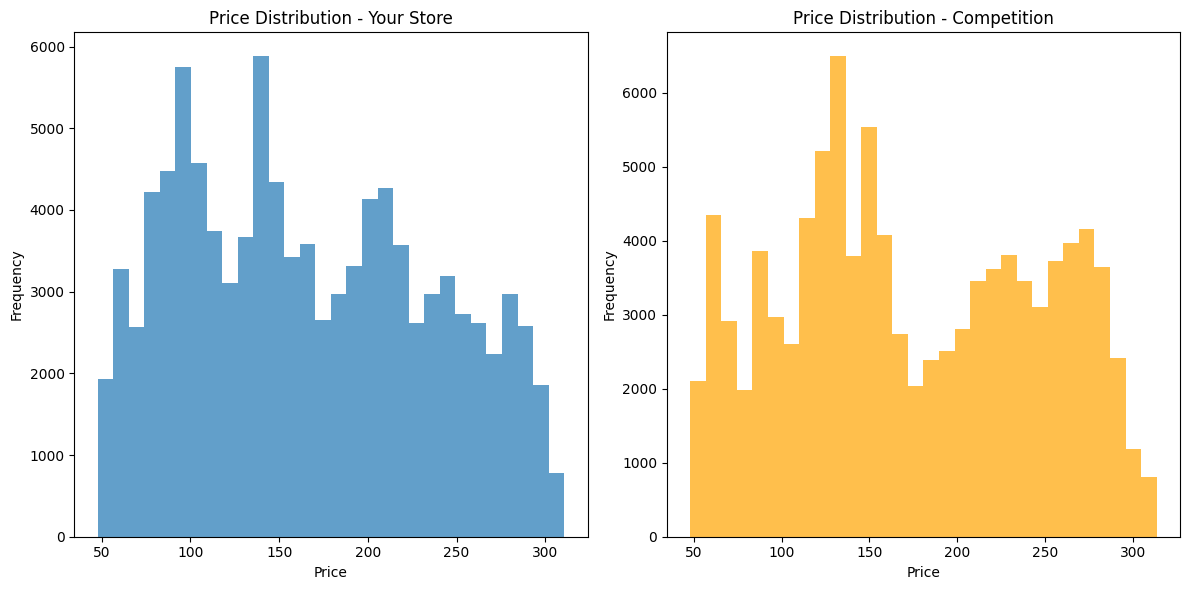

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pricing_data['Price'], bins=30, alpha=0.7, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(pricing_data['Competition_Price'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

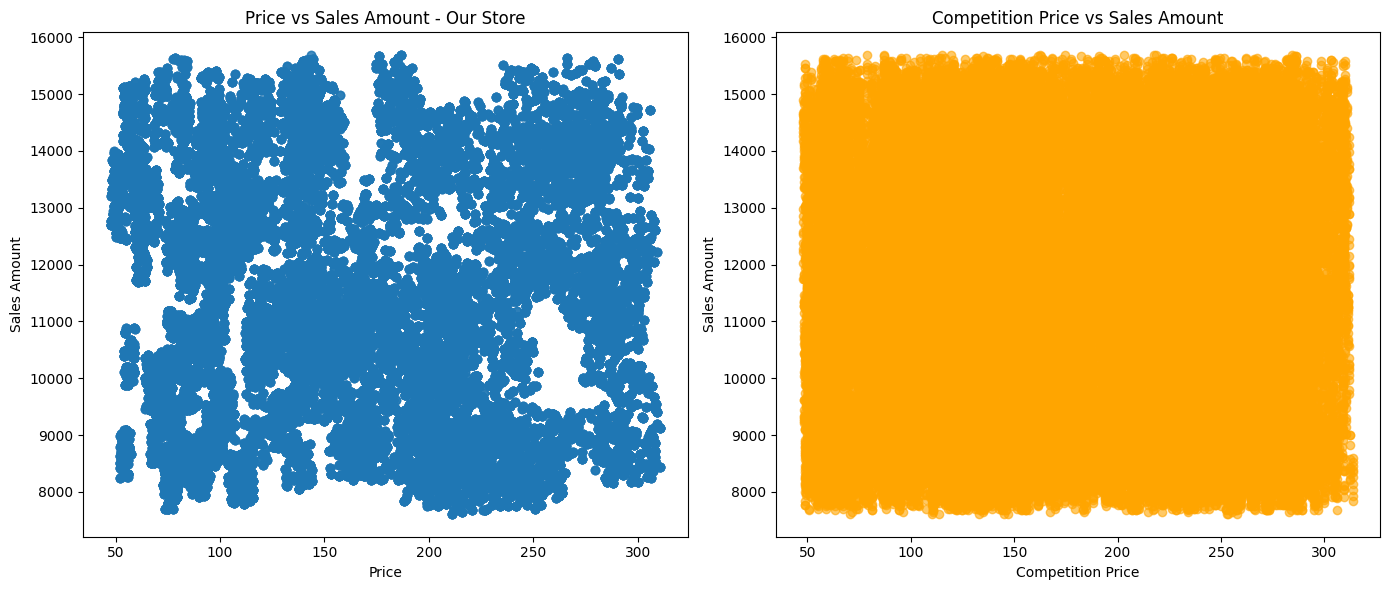

In [20]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha=0.6, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

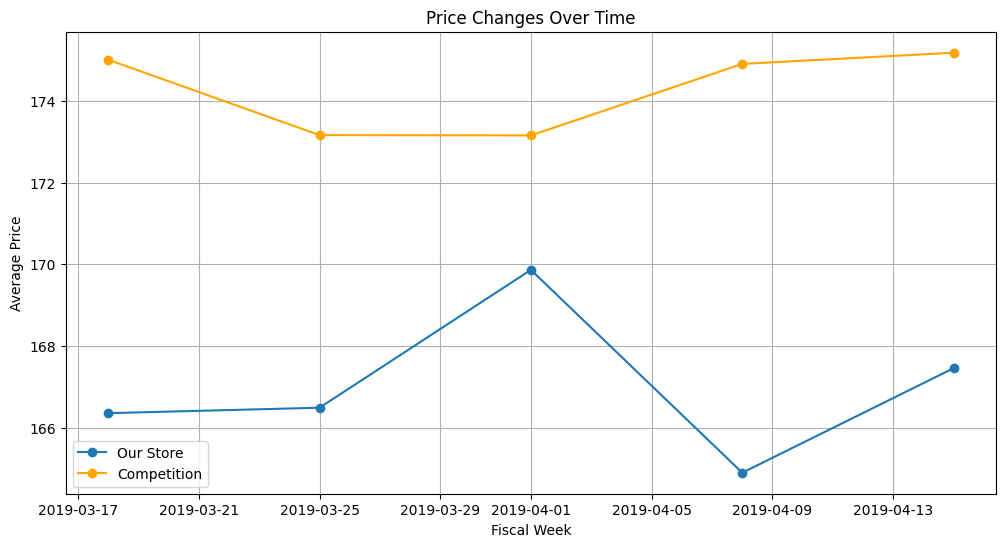

In [21]:
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

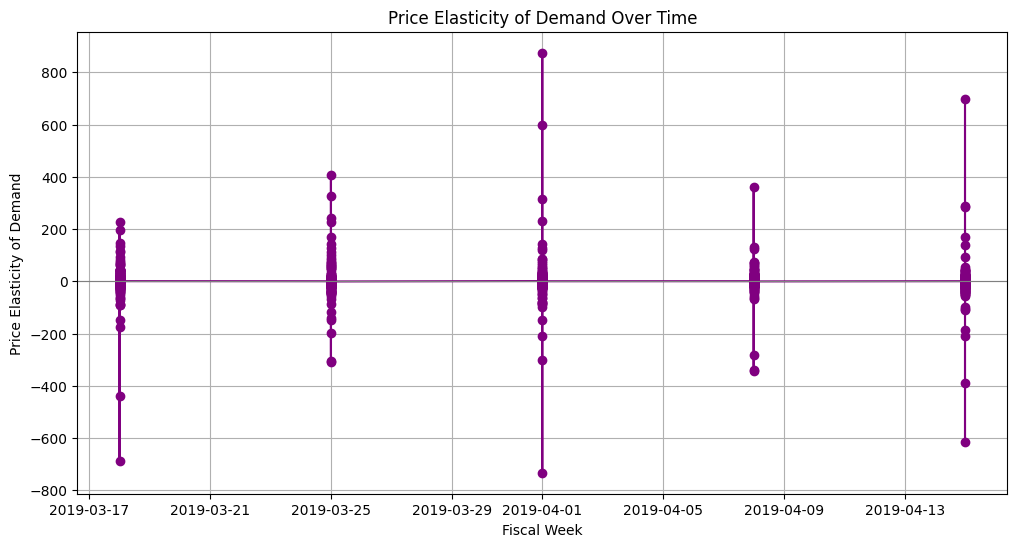

In [22]:
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

In [23]:
total_sales_your_store = pricing_data['Sales_Amount'].sum()
total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

total_qty_your_store = pricing_data['Item_Quantity'].sum()
total_qty_competition = pricing_data['Item_Quantity'].sum()  # assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})


summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [24]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


# Exploratory Data Analysis (EDA)
This section provides an overview of the dataset, including statistical summaries and visualizations.

In [25]:
# Display basic statistics of the dataset
pricing_data.describe()

,Index,Fiscal_Week_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,competition_sales_amt
count,9991.00000,9991,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,50020.47753,2019-03-31 23:56:58.396556800,166.613153,398.836553,4765.338378,11420.325022,174.692095,0.025438,0.003195,0.147094,69683.685823
min,10.00000,2019-03-18 00:00:00,47.700000,285.000000,2003.700000,7613.560000,48.530000,-0.790646,-0.418919,-732.710692,14926.870000
25%,24797.50000,2019-03-25 00:00:00,105.610000,348.000000,3462.425000,9544.840000,119.340000,-0.032429,-0.031824,-0.893601,45324.450000
50%,50129.00000,2019-04-01 00:00:00,158.800000,400.000000,4745.930000,11267.170000,168.590000,0.000371,0.000000,0.000000,66174.460000
75%,74822.00000,2019-04-08 00:00:00,221.205000,450.000000,6059.340000,13226.805000,236.980000,0.034650,0.032647,0.931124,93572.145000
max,99995.00000,2019-04-15 00:00:00,310.660000,522.000000,7853.810000,15685.080000,312.080000,4.483155,0.735786,875.206972,152964.790000
std,28991.81766,NaN,69.163703,59.263079,1532.655930,2107.994468,71.310931,0.291627,0.081933,24.631401,30662.681743


In [26]:
# Check for missing values
pricing_data.isnull().sum()

Index                        0
Fiscal_Week_ID               0
Store_ID                     0
Item_ID                      0
Price                        0
Item_Quantity                0
Sales_Amount_No_Discount     0
Sales_Amount                 0
Competition_Price            0
price_change                 0
qty_change                   0
elasticity                   0
price_bracket                0
competition_price_bracket    0
competition_sales_amt        0
dtype: int64

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Fiscal_Week_ID'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Item_Quantity'}>,
        <Axes: title={'center': 'Sales_Amount_No_Discount'}>,
        <Axes: title={'center': 'Sales_Amount'}>],
       [<Axes: title={'center': 'Competition_Price'}>,
        <Axes: title={'center': 'price_change'}>,
        <Axes: title={'center': 'qty_change'}>],
       [<Axes: title={'center': 'elasticity'}>,
        <Axes: title={'center': 'competition_sales_amt'}>, <Axes: >]],
      dtype=object)

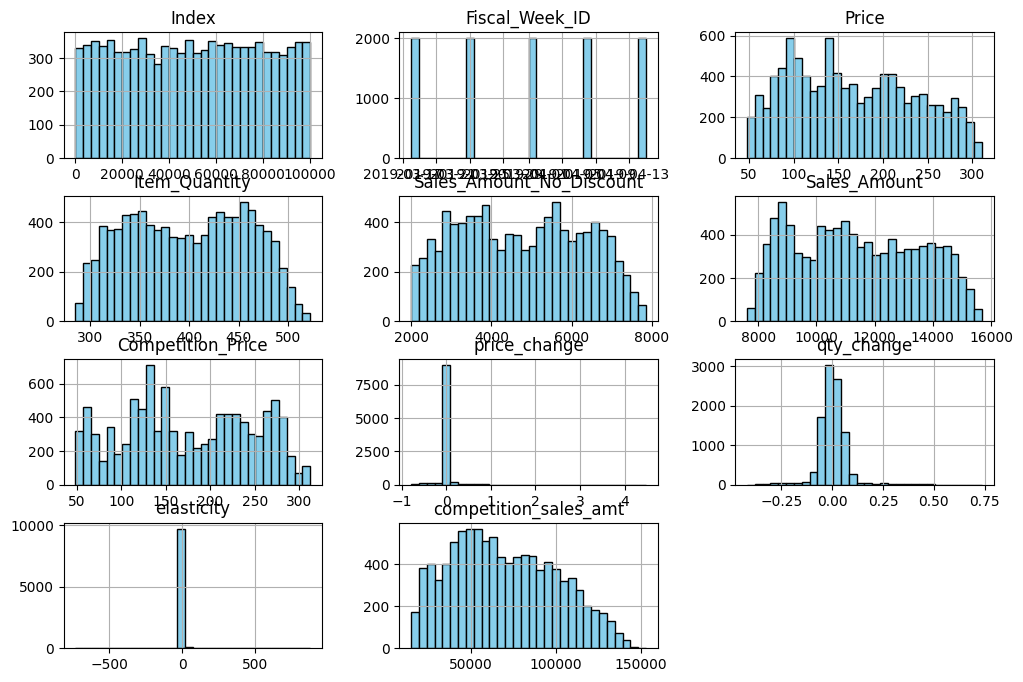

In [27]:
# Visualize the distribution of numerical columns
pricing_data.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')

In [16]:
# Handling non-numeric values in the dataset
# Convert columns to numeric where applicable, and handle errors gracefully
pricing_data['Price'] = pd.to_numeric(pricing_data['Price'], errors='coerce')
pricing_data['Competition_Price'] = pd.to_numeric(pricing_data['Competition_Price'], errors='coerce')
pricing_data['Item_Quantity'] = pd.to_numeric(pricing_data['Item_Quantity'], errors='coerce')
pricing_data['Sales_Amount_No_Discount'] = pd.to_numeric(pricing_data['Sales_Amount_No_Discount'], errors='coerce')
pricing_data['Sales_Amount'] = pd.to_numeric(pricing_data['Sales_Amount'], errors='coerce')

# Drop rows with invalid numeric values
pricing_data.dropna(subset=['Price', 'Competition_Price', 'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount'], inplace=True)

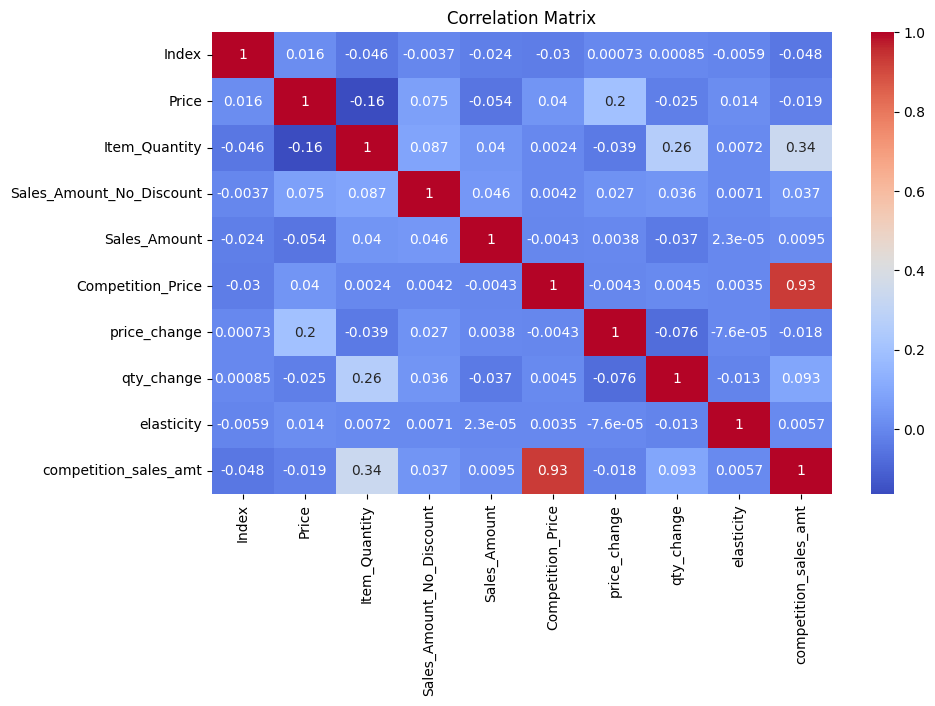

In [30]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns from pricing_data
numeric_data = pricing_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Identify variables with the highest correlation

numeric_data = pricing_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs < 1]  # Exclude self-correlation

# Display top correlated pairs
print("Top correlated variable pairs:")
print(high_correlation_pairs.head(10))

Top correlated variable pairs:
competition_sales_amt  Competition_Price        0.931024
Competition_Price      competition_sales_amt    0.931024
competition_sales_amt  Item_Quantity            0.340484
Item_Quantity          competition_sales_amt    0.340484
                       qty_change               0.260533
qty_change             Item_Quantity            0.260533
Price                  price_change             0.196066
price_change           Price                    0.196066
qty_change             competition_sales_amt    0.093306
competition_sales_amt  qty_change               0.093306
dtype: float64


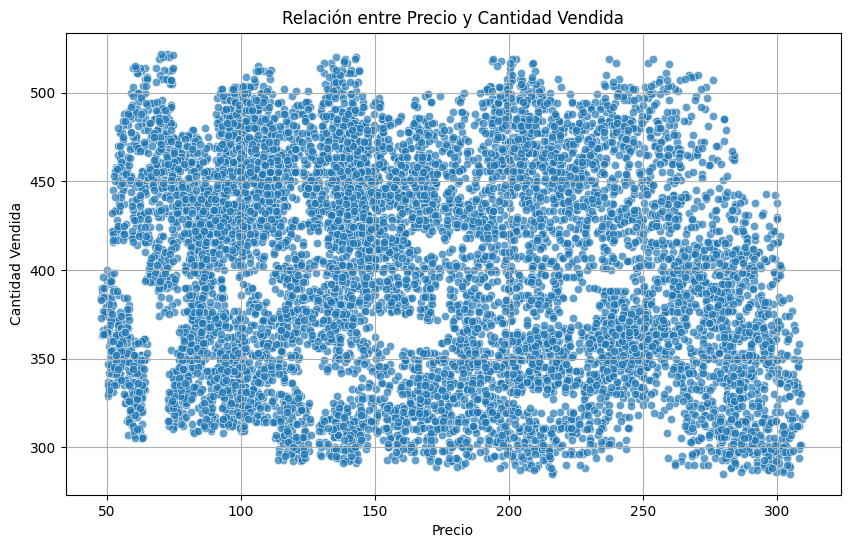

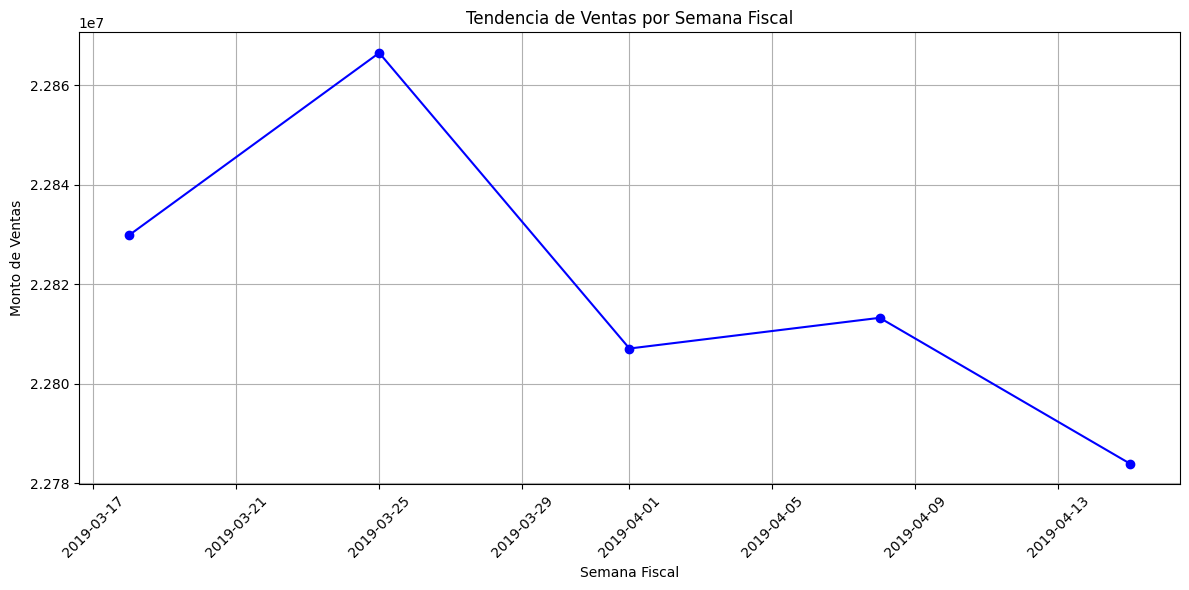

In [35]:
# Visualización de Relaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión: Precio vs Cantidad Vendida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pricing_data, x='Price', y='Item_Quantity', alpha=0.7)
plt.title('Relación entre Precio y Cantidad Vendida')
plt.xlabel('Precio')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.show()

# Gráfico de línea: Tendencia de Ventas por Semana Fiscal
plt.figure(figsize=(12, 6))
weekly_sales = pricing_data.groupby('Fiscal_Week_ID')['Sales_Amount'].sum().reset_index()
plt.plot(weekly_sales['Fiscal_Week_ID'], weekly_sales['Sales_Amount'], marker='o', linestyle='-', color='blue')
plt.title('Tendencia de Ventas por Semana Fiscal')
plt.xlabel('Semana Fiscal')
plt.ylabel('Monto de Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

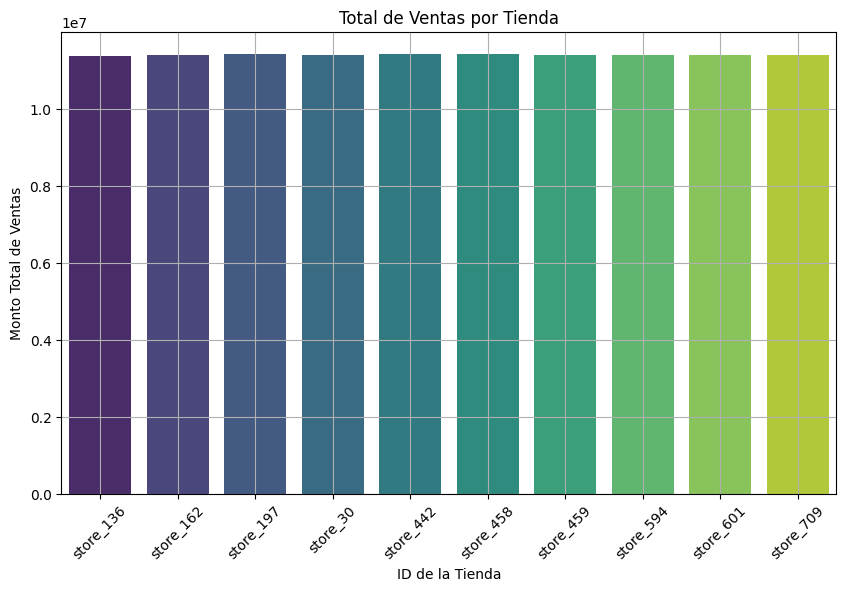

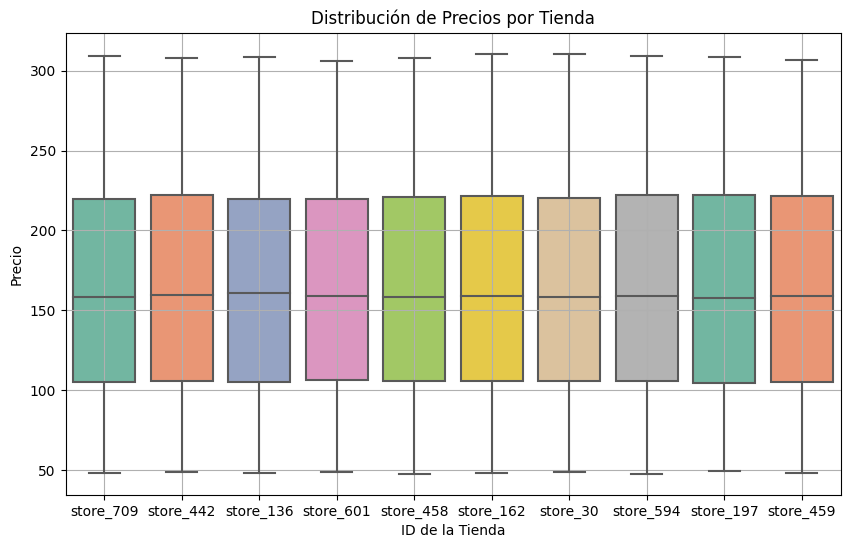

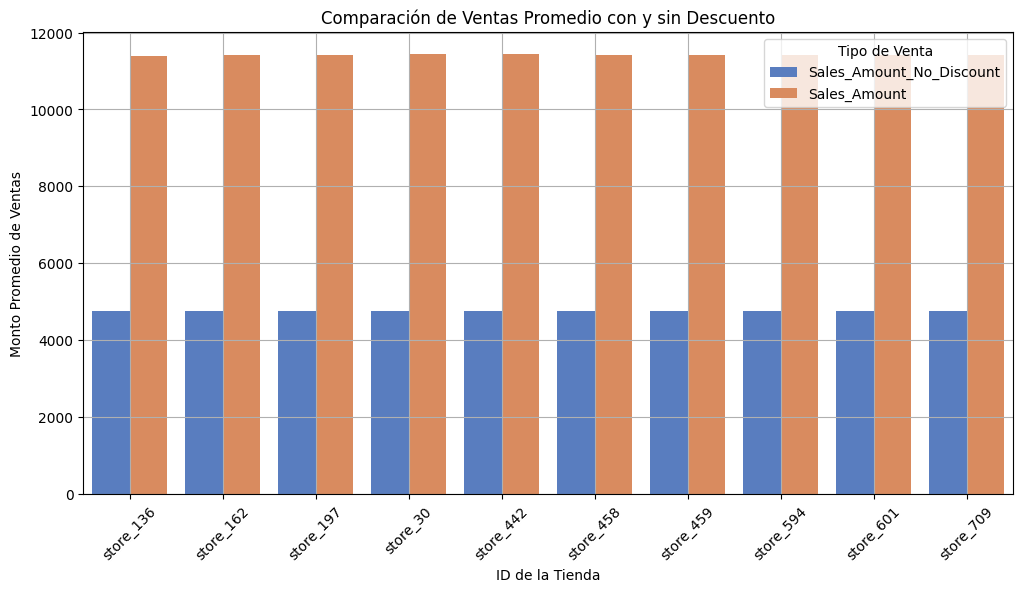

In [ ]:
# Visualización de Relaciones Adicionales
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras: Total de Ventas por Tienda
plt.figure(figsize=(10, 6))
sales_by_store = pricing_data.groupby('Store_ID')['Sales_Amount'].sum().reset_index()
sns.barplot(data=sales_by_store, x='Store_ID', y='Sales_Amount', palette='viridis')
plt.title('Total de Ventas por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico de caja: Distribución de Precios por Tienda
plt.figure(figsize=(10, 6))
sns.boxplot(data=pricing_data, x='Store_ID', y='Price', palette='Set2')
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Gráfico de barras apiladas: Comparación de Ventas con y sin Descuento
plt.figure(figsize=(12, 6))
discount_comparison = pricing_data.groupby('Store_ID')[['Sales_Amount_No_Discount', 'Sales_Amount']].mean().reset_index()
discount_comparison = pd.melt(discount_comparison, id_vars='Store_ID', value_vars=['Sales_Amount_No_Discount', 'Sales_Amount'], var_name='Tipo de Venta', value_name='Monto Promedio')
sns.barplot(data=discount_comparison, x='Store_ID', y='Monto Promedio', hue='Tipo de Venta', palette='muted')
plt.title('Comparación de Ventas Promedio con y sin Descuento')
plt.xlabel('ID de la Tienda')
plt.ylabel('Monto Promedio de Ventas')
plt.legend(title='Tipo de Venta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

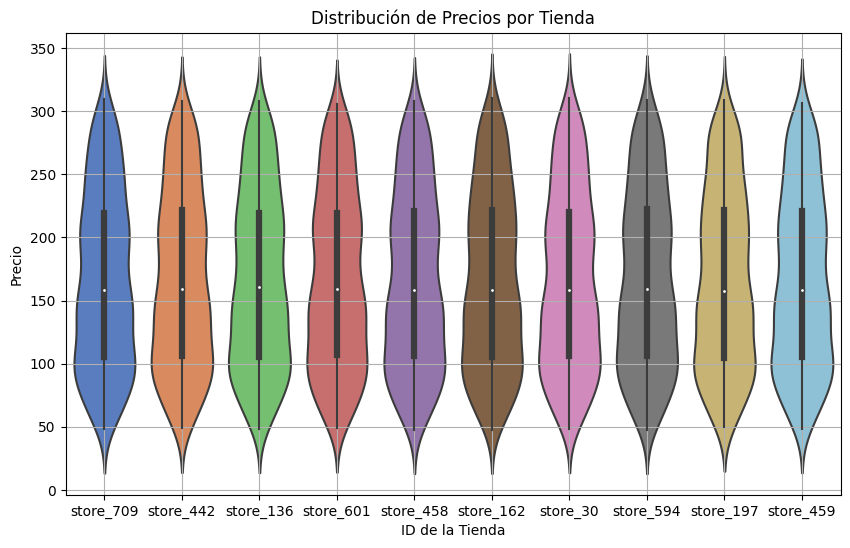

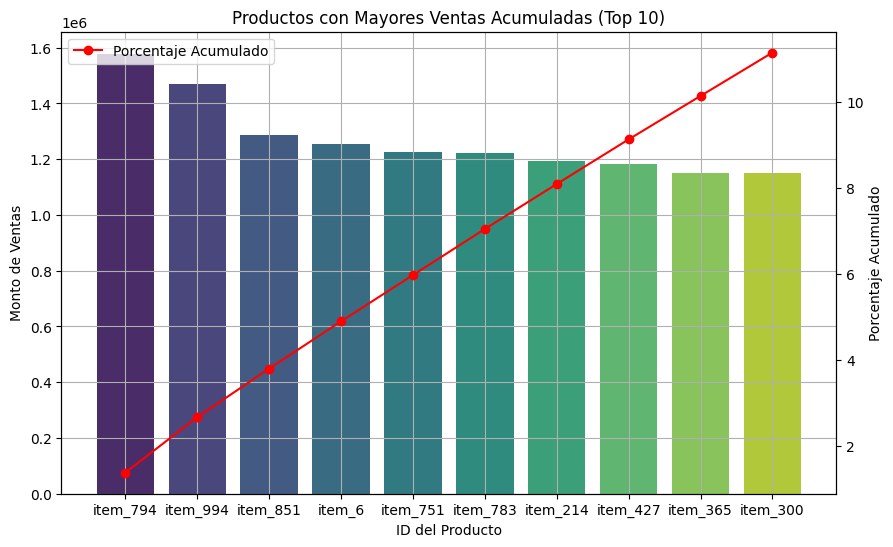

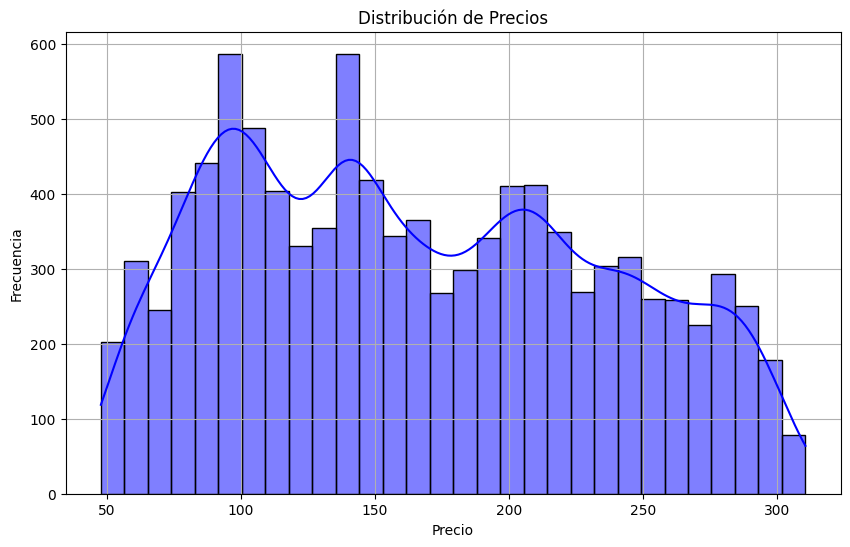

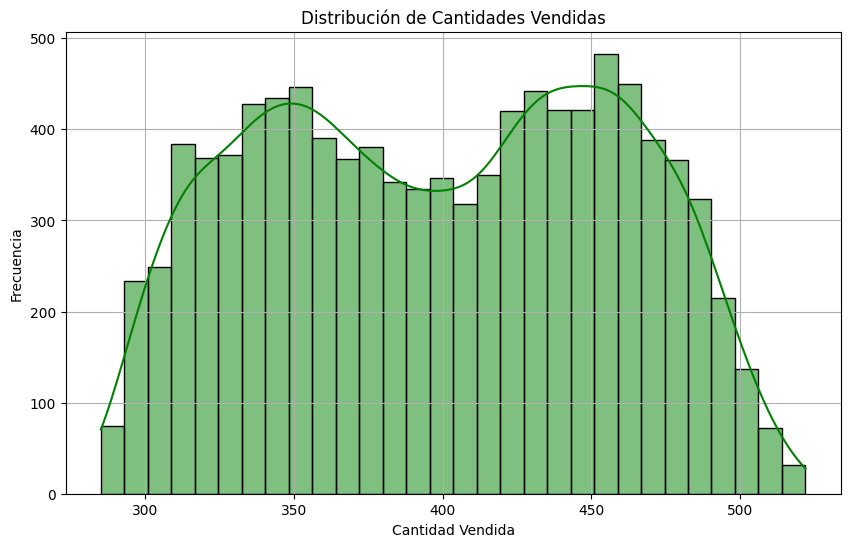

In [37]:
# Gráfico de Violin: Comparación de precios entre tiendas
plt.figure(figsize=(10, 6))
sns.violinplot(data=pricing_data, x='Store_ID', y='Price', palette='muted')
plt.title('Distribución de Precios por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Gráfico de Pareto: Productos con mayores ventas acumuladas
plt.figure(figsize=(10, 6))
pareto_data = pricing_data.groupby('Item_ID')['Sales_Amount'].sum().reset_index().sort_values(by='Sales_Amount', ascending=False)
pareto_data['Cumulative_Percentage'] = pareto_data['Sales_Amount'].cumsum() / pareto_data['Sales_Amount'].sum() * 100
sns.barplot(data=pareto_data.head(10), x='Item_ID', y='Sales_Amount', palette='viridis')
plt.title('Productos con Mayores Ventas Acumuladas (Top 10)')
plt.xlabel('ID del Producto')
plt.ylabel('Monto de Ventas')
plt.grid(True)
plt.twinx()
plt.plot(pareto_data['Item_ID'].head(10), pareto_data['Cumulative_Percentage'].head(10), color='red', marker='o', label='Porcentaje Acumulado')
plt.ylabel('Porcentaje Acumulado')
plt.legend(loc='upper left')
plt.show()

# Histograma: Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data['Price'], bins=30, kde=True, color='blue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Histograma: Distribución de cantidades vendidas
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data['Item_Quantity'], bins=30, kde=True, color='green')
plt.title('Distribución de Cantidades Vendidas')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

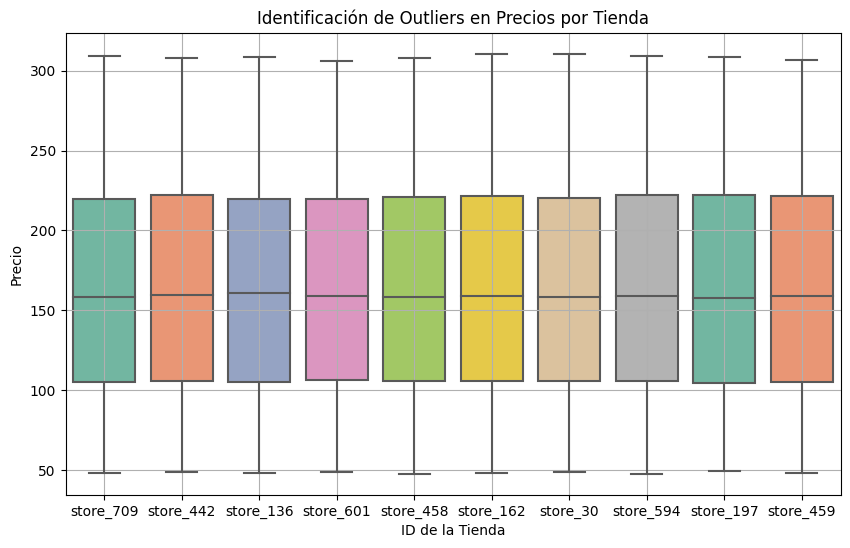

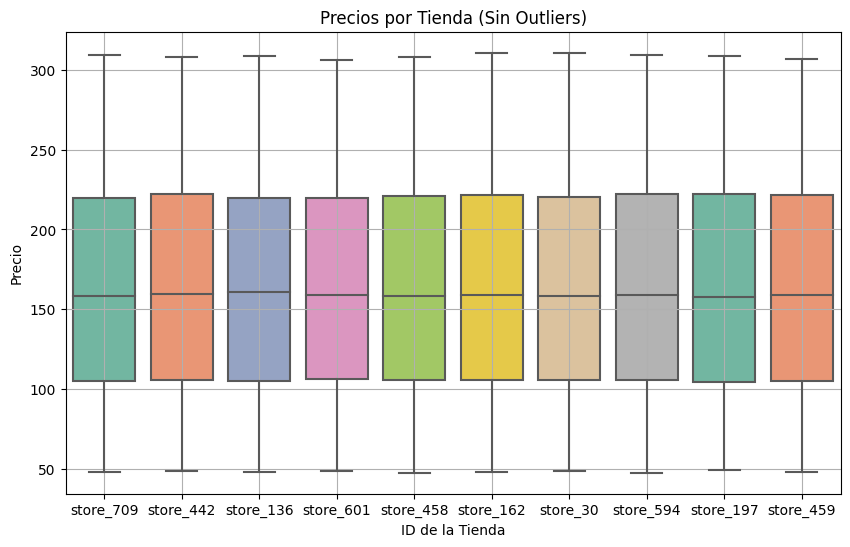

In [38]:
# Identificación de Outliers: Gráfico de Caja (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=pricing_data, x='Store_ID', y='Price', palette='Set2')
plt.title('Identificación de Outliers en Precios por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Decisión sobre manejo de outliers
# Calcular límites para identificar outliers
Q1 = pricing_data['Price'].quantile(0.25)
Q3 = pricing_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar datos para eliminar outliers
filtered_data = pricing_data[(pricing_data['Price'] >= lower_bound) & (pricing_data['Price'] <= upper_bound)]

# Visualización después de eliminar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Store_ID', y='Price', palette='Set2')
plt.title('Precios por Tienda (Sin Outliers)')
plt.xlabel('ID de la Tienda')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

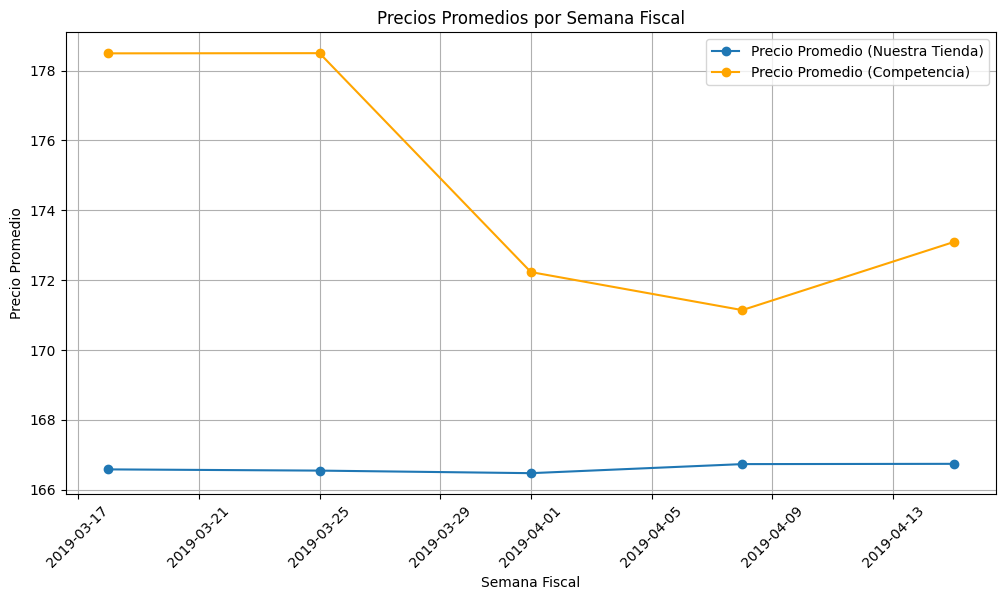

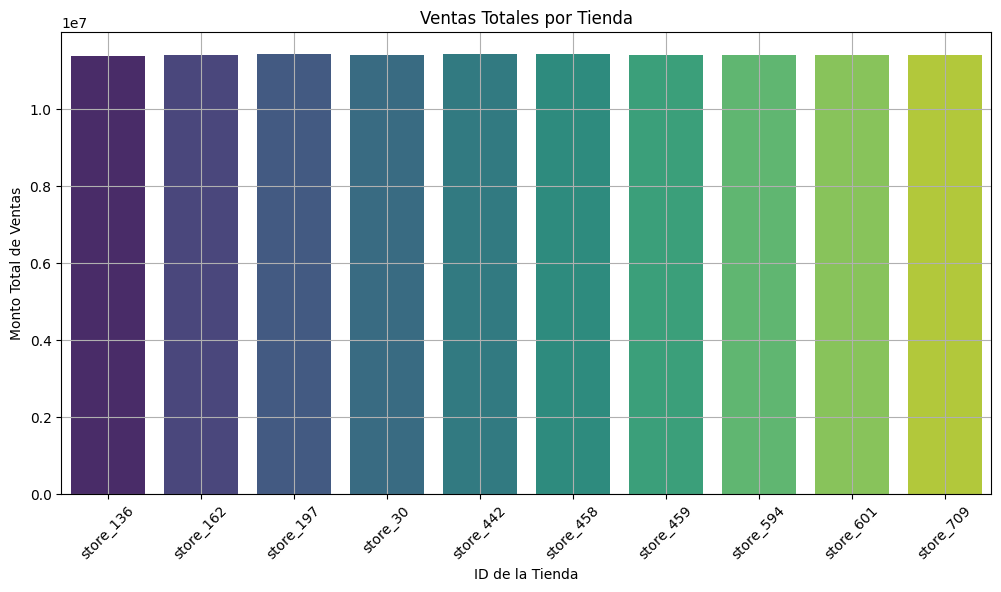

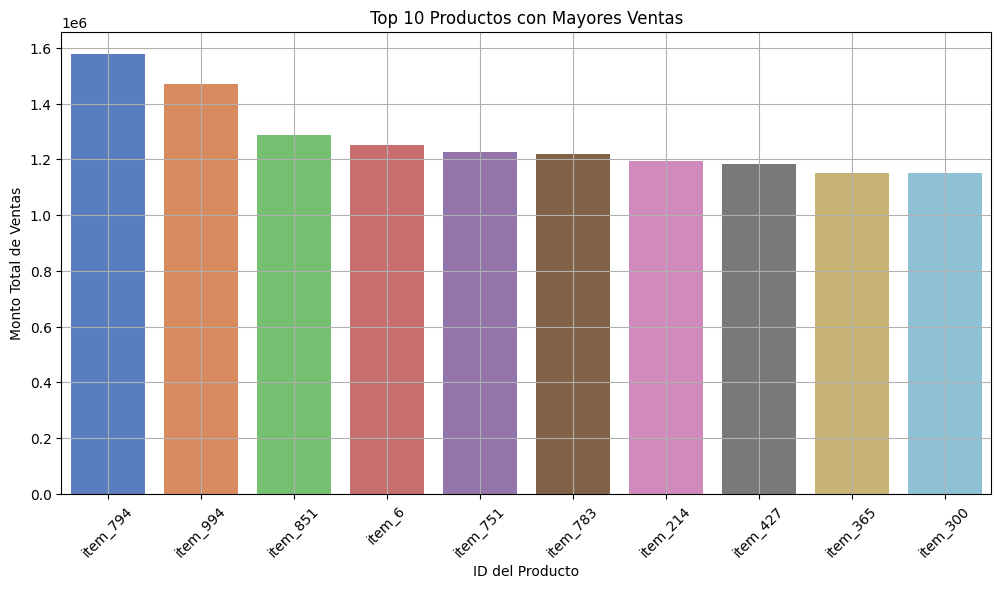

In [39]:
# Segmentación y Agrupación: Agrupar datos por semanas fiscales y calcular métricas agregadas
weekly_data = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean',
    'Sales_Amount': 'sum',
    'Item_Quantity': 'sum'
}).reset_index()

# Visualización de métricas agregadas por semanas fiscales
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['Fiscal_Week_ID'], weekly_data['Price'], label='Precio Promedio (Nuestra Tienda)', marker='o')
plt.plot(weekly_data['Fiscal_Week_ID'], weekly_data['Competition_Price'], label='Precio Promedio (Competencia)', marker='o', color='orange')
plt.xlabel('Semana Fiscal')
plt.ylabel('Precio Promedio')
plt.title('Precios Promedios por Semana Fiscal')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Agrupar datos por tiendas y calcular métricas agregadas
store_data = pricing_data.groupby('Store_ID').agg({
    'Sales_Amount': 'sum',
    'Item_Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Visualización de métricas agregadas por tienda
plt.figure(figsize=(12, 6))
sns.barplot(data=store_data, x='Store_ID', y='Sales_Amount', palette='viridis')
plt.title('Ventas Totales por Tienda')
plt.xlabel('ID de la Tienda')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Agrupar datos por productos y calcular métricas agregadas
product_data = pricing_data.groupby('Item_ID').agg({
    'Sales_Amount': 'sum',
    'Item_Quantity': 'sum',
    'Price': 'mean'
}).reset_index()

# Visualización de métricas agregadas por producto (Top 10 productos con mayores ventas)
top_products = product_data.sort_values(by='Sales_Amount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Item_ID', y='Sales_Amount', palette='muted')
plt.title('Top 10 Productos con Mayores Ventas')
plt.xlabel('ID del Producto')
plt.ylabel('Monto Total de Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Documentación del Análisis Exploratorio de Datos (EDA)

## Hallazgos Clave
1. **Distribución de Precios**:
   - Los precios de los productos muestran una distribución con algunos valores atípicos identificados mediante gráficos de caja (boxplots).
   - La competencia tiene una distribución de precios similar, pero con ligeras variaciones en los rangos.

2. **Relación Precio vs Cantidad Vendida**:
   - Existe una relación inversa entre el precio y la cantidad vendida, lo que sugiere una posible elasticidad de la demanda.

3. **Tendencias Temporales**:
   - Los precios y las ventas muestran fluctuaciones significativas a lo largo de las semanas fiscales.
   - La competencia parece ajustar sus precios en paralelo con nuestra tienda.

4. **Ventas por Tienda**:
   - Algunas tiendas generan significativamente más ventas que otras, lo que podría estar relacionado con la ubicación o estrategias de precios.

5. **Productos con Mayores Ventas**:
   - Un pequeño grupo de productos genera la mayoría de las ventas, identificado mediante un gráfico de Pareto.

6. **Outliers**:
   - Se identificaron valores atípicos en los precios. Estos fueron filtrados utilizando el rango intercuartílico (IQR) para un análisis más limpio.

## Problemas Identificados
1. **Valores Atípicos**:
   - Los precios contienen outliers que podrían distorsionar el análisis. Se recomienda eliminarlos o transformarlos según el contexto.

2. **Datos Faltantes**:
   - Algunas columnas tienen valores nulos que deben ser tratados para evitar errores en el análisis.

3. **Datos No Numéricos**:
   - Algunas columnas contienen valores no numéricos que fueron convertidos a formato numérico para facilitar el análisis.

4. **Segmentación Incompleta**:
   - La segmentación por categorías como tiendas y productos podría ser más detallada para identificar patrones específicos.

## Recomendaciones
1. **Limpieza Adicional**:
   - Continuar con la eliminación de valores nulos y outliers en otras columnas relevantes.
   - Validar la calidad de los datos en columnas categóricas.

2. **Análisis Avanzado**:
   - Realizar análisis de elasticidad de la demanda para optimizar precios.
   - Investigar las razones detrás de las diferencias de ventas entre tiendas.

3. **Visualizaciones Complementarias**:
   - Incorporar gráficos de radar para comparar métricas clave entre tiendas.
   - Utilizar gráficos de área para analizar acumulación de ventas a lo largo del tiempo.

4. **Automatización**:
   - Crear scripts para automatizar la limpieza y segmentación de datos en futuros análisis.

Este documento puede servir como base para futuras iteraciones del análisis y para comunicar los hallazgos clave a los interesados.